In [31]:
import emoji
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow
from tensorflow.keras import Model
from tensorflow import keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import utils 

In [2]:
emojiset = {0: "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
            1: ":baseball:",
            2: ":beaming_face_with_smiling_eyes:",
            3: ":downcast_face_with_sweat:",
            4: ":fork_and_knife:",
            }

df_train = pd.read_csv('train_emoji.csv',header = None)
df_test = pd.read_csv('test_emoji.csv',header = None)

In [3]:
embedding = {}
with open('glove.6B.50d.txt',encoding = 'utf8') as f:
    for line in f:
        vec = line.split()
        embedding[vec[0]] = np.asarray(vec[1:])        

In [4]:
# Basic text preprocessing 
X_train = df_train.loc[:,0].values.copy()
y_train = df_train.loc[:,1].values.copy()
for i in range(X_train.shape[0]):
    sentence = X_train[i]
    l = np.array(sentence.lower().split())
    X_train[i] = np.array(l)
X_train = np.array(X_train)
y_train = utils.to_categorical(y_train,5)

In [5]:
# Basic text preprocessing 
X_test = df_test.loc[:,0].values.copy()
y_test = df_test.loc[:,1].values.copy()
for i in range(X_test.shape[0]):
    sentence = X_test[i]
    l = np.array(sentence.lower().split())
    X_test[i] = np.array(l)
X_test = np.array(X_test)
y_test = utils.to_categorical(y_test,5)

In [32]:
def embedding_output(X,maxLen):
    out = np.zeros((X.shape[0],maxLen,50)) # 50 is embedding dimenstion
    for i in range(X.shape[0]):
        temp = X[i].copy()
        for idx,word in enumerate(temp):
            if(idx >= 50):
                break
            out[i][idx] = embedding[word]
    return out

In [7]:
X_train = embedding_output(X_train,10)
X_test = embedding_output(X_test,10)

In [8]:
# Define model architecture RNN/LSTM Model

In [9]:
callbacks = [
    tensorflow.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                     monitor = 'val_loss',
                                     save_weights_only = True,
                                     save_best_only = True
                                )
    ]

In [21]:
model = Sequential()
model.add(LSTM(64,input_shape = (10,50),return_sequences=True))
model.add(Dropout(.5))
model.add(LSTM(64,return_sequences = False))
model.add(Dropout(.5))
model.add(Dense(5,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 64)            29440     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 62,789
Trainable params: 62,789
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist = model.fit(X_train,y_train,epochs = 150 ,callbacks = callbacks,validation_split = .2,shuffle = True,batch_size = 64)

Train on 105 samples, validate on 27 samples
Epoch 1/150
105/105 [==============================] - 3s 28ms/sample - loss: 1.6276 - accuracy: 0.2381 - val_loss: 1.5998 - val_accuracy: 0.1852
Epoch 2/150
105/105 [==============================] - 0s 380us/sample - loss: 1.5971 - accuracy: 0.2476 - val_loss: 1.5955 - val_accuracy: 0.2222
Epoch 3/150
105/105 [==============================] - 0s 399us/sample - loss: 1.5570 - accuracy: 0.3429 - val_loss: 1.5957 - val_accuracy: 0.2222
Epoch 4/150
105/105 [==============================] - 0s 361us/sample - loss: 1.5051 - accuracy: 0.4286 - val_loss: 1.5992 - val_accuracy: 0.2593
Epoch 5/150
105/105 [==============================] - 0s 380us/sample - loss: 1.4724 - accuracy: 0.4476 - val_loss: 1.6051 - val_accuracy: 0.2963
Epoch 6/150
105/105 [==============================] - 0s 427us/sample - loss: 1.4386 - accuracy: 0.4476 - val_loss: 1.6217 - val_accuracy: 0.2963
Epoch 7/150
105/105 [==============================] - 0s 446us/sample - l

105/105 [==============================] - 0s 323us/sample - loss: 0.1185 - accuracy: 0.9810 - val_loss: 0.7451 - val_accuracy: 0.7037
Epoch 57/150
105/105 [==============================] - 0s 313us/sample - loss: 0.0855 - accuracy: 0.9714 - val_loss: 0.7523 - val_accuracy: 0.8148
Epoch 58/150
105/105 [==============================] - 0s 323us/sample - loss: 0.0897 - accuracy: 0.9810 - val_loss: 0.8324 - val_accuracy: 0.7778
Epoch 59/150
105/105 [==============================] - 0s 342us/sample - loss: 0.0849 - accuracy: 0.9810 - val_loss: 0.8921 - val_accuracy: 0.7037
Epoch 60/150
105/105 [==============================] - 0s 332us/sample - loss: 0.0637 - accuracy: 0.9905 - val_loss: 1.1370 - val_accuracy: 0.7037
Epoch 61/150
105/105 [==============================] - 0s 332us/sample - loss: 0.0888 - accuracy: 0.9810 - val_loss: 1.0575 - val_accuracy: 0.7037
Epoch 62/150
105/105 [==============================] - 0s 342us/sample - loss: 0.0986 - accuracy: 0.9905 - val_loss: 0.9313 

105/105 [==============================] - 0s 342us/sample - loss: 0.0160 - accuracy: 1.0000 - val_loss: 1.1228 - val_accuracy: 0.7778
Epoch 112/150
105/105 [==============================] - 0s 332us/sample - loss: 0.0121 - accuracy: 1.0000 - val_loss: 1.1050 - val_accuracy: 0.7778
Epoch 113/150
105/105 [==============================] - 0s 323us/sample - loss: 0.0104 - accuracy: 1.0000 - val_loss: 1.0976 - val_accuracy: 0.7778
Epoch 114/150
105/105 [==============================] - 0s 323us/sample - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.1258 - val_accuracy: 0.7778
Epoch 115/150
105/105 [==============================] - 0s 332us/sample - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.1812 - val_accuracy: 0.7407
Epoch 116/150
105/105 [==============================] - 0s 332us/sample - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.2301 - val_accuracy: 0.7037
Epoch 117/150
105/105 [==============================] - 0s 332us/sample - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1

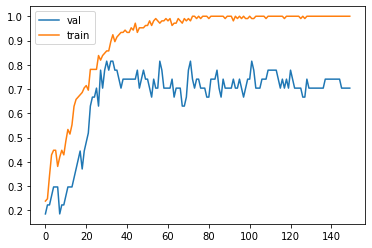

In [24]:
plt.plot(hist.history['val_accuracy'],label = 'val')
plt.plot(hist.history['accuracy'],label = 'train')
plt.legend()

In [14]:
print(embedding['.'])

['0.15164' '0.30177' '-0.16763' '0.17684' '0.31719' '0.33973' '-0.43478'
 '-0.31086' '-0.44999' '-0.29486' '0.16608' '0.11963' '-0.41328'
 '-0.42353' '0.59868' '0.28825' '-0.11547' '-0.041848' '-0.67989'
 '-0.25063' '0.18472' '0.086876' '0.46582' '0.015035' '0.043474' '-1.4671'
 '-0.30384' '-0.023441' '0.30589' '-0.21785' '3.746' '0.0042284'
 '-0.18436' '-0.46209' '0.098329' '-0.11907' '0.23919' '0.1161' '0.41705'
 '0.056763' '-6.3681e-05' '0.068987' '0.087939' '-0.10285' '-0.13931'
 '0.22314' '-0.080803' '-0.35652' '0.016413' '0.10216']


In [27]:
model.load_weights('best_model.h5')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            29440     
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 62,789
Trainable params: 62,789
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Evaluation on training set
model.evaluate(X_train,y_train,batch_size = 64)
model.evaluate(X_test,y_test,batch_size = 64)

56/56 [==============================] - 0s 143us/sample - loss: 1.1129 - accuracy: 0.6964


[1.1129008531570435, 0.6964286]

In [29]:
output = model.predict_classes(X_test,batch_size=64)

In [30]:
for idx,sent in enumerate(df_test.iloc[:,0].values):
    print(sent,emoji.emojize(emojiset[output[idx]]))

I want to eat	 🍴
he did not answer	 😓
he got a raise	 😁
she got me a present	 ❤️
ha ha ha it was so funny	 😁
he is a good friend	 😁
I am upset	 😓
We had such a lovely dinner tonight	 😁
where is the food	 🍴
Stop making this joke ha ha ha	 😁
where is the ball	 ⚾
work is hard	 😓
This girl is messing with me	 ❤️
are you serious ha ha	 😓
Let us go play baseball	 ⚾
This stupid grader is not working 	 😓
work is horrible	 😓
Congratulation for having a baby	 😁
stop messing around	 😓
any suggestions for dinner	 🍴
I love taking breaks	 ❤️
you brighten my day	 ❤️
I boiled rice	 🍴
she is a bully	 😓
Why are you feeling bad	 😓
I am upset	 😓
I worked during my birthday	 😁
My grandmother is the love of my life	 ❤️
enjoy your break	 🍴
valentine day is near	 😁
I miss you so much	 ❤️
throw the ball	 ⚾
My life is so boring	 ❤️
she said yes	 😁
will you be my valentine	 ❤️
he can pitch really well	 ⚾
dance with me	 😁
I am starving	 😓
See you at the restaurant	 🍴
I like to laugh	 😁
I will go dance ⚾
I like yo

In [40]:
def predictWord(x):
    curr_x = np.array([x.lower().split(' ')])
    embed = embedding_output(curr_x,10)
    y_pred = model.predict_classes(embed)
    return y_pred[0]

In [45]:
print(emoji.emojize(emojiset[predictWord('Very happy i am')]))

😁


In [52]:
def algo():
    while(1):
        print("Enter the sentence(type 'stop' to end) :")
        x = input()
        if(x == 'stop'):
            break
        print(emoji.emojize(emojiset[predictWord(x)]))

In [54]:
algo()

Enter the sentence(type 'stop' to end) :
i love you
❤️
Enter the sentence(type 'stop' to end) :
i love maths
❤️
Enter the sentence(type 'stop' to end) :
i like ice cream
😁
Enter the sentence(type 'stop' to end) :
food is tasty
🍴
Enter the sentence(type 'stop' to end) :
icecream is nice
😁
Enter the sentence(type 'stop' to end) :
get me something
😓
Enter the sentence(type 'stop' to end) :
kill me
😓
Enter the sentence(type 'stop' to end) :
kill me happy
😓
Enter the sentence(type 'stop' to end) :
kill me happy happy happy
😁
Enter the sentence(type 'stop' to end) :
stop
